<a href="https://colab.research.google.com/github/varekarprajwal/Fuzzylogic/blob/main/Neural_Network_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Adaline:
    def __init__(self, learning_rate=0.01, num_features=1):
        self.learning_rate = learning_rate
        self.weights = np.random.randn(num_features) * 0.01  # Small random weights
        self.bias = 0.0
        self.errors = []  # Store MSE for each epoch

    def net_input(self, X):
        return np.dot(X, self.weights) + self.bias

    def predict(self, X):
        return self.net_input(X)  # Linear output for Adaline

    def train(self, X, y, epochs=50):
        n_samples = X.shape[0]

        for epoch in range(epochs):
            output = self.net_input(X)
            errors = y - output
            mse = (errors ** 2).mean()  # Mean Squared Error
            self.errors.append(mse)

            # Weight and bias update (batch gradient descent)
            self.weights += self.learning_rate * X.T.dot(errors) / n_samples
            self.bias += self.learning_rate * errors.sum() / n_samples

            # Print debug info
            print(f"Epoch {epoch+1}/{epochs} - MSE: {mse:.4f}")

    def classify(self, X, threshold=0.0):
        return np.where(self.net_input(X) >= threshold, 1, -1)

In [3]:
# Example usage
# Assuming you have your training data X and y
# Question 1
X = np.array([
    [ 1.0,-1.0,-1.0,-1.0,   1.0, 1.0, 1.0, 1.0,   1.0,-1.0,-1.0,-1.0,  -1.0,-1.0,-1.0,-1.0],
    [ 1.0, 1.0, 1.0, 1.0,   1.0,-1.0, 1.0, 1.0,   1.0,-1.0, 1.0, 1.0,  -1.0,-1.0,-1.0,-1.0],
    [ 1.0, 1.0, 1.0, 1.0,   1.0, 1.0,-1.0,-1.0,   1.0, 1.0,-1.0,-1.0,  -1.0,-1.0,-1.0,-1.0],
    [-1.0,-1.0,-1.0,-1.0,   1.0,-1.0,-1.0,-1.0,   1.0, 1.0, 1.0, 1.0,   1.0,-1.0,-1.0,-1.0],
    [-1.0,-1.0,-1.0,-1.0,   1.0,-1.0,-1.0,-1.0,   1.0,-1.0, 1.0, 1.0,   1.0,-1.0, 1.0, 1.0]
])
y = np.array([60, 0, -60, 60, 0])

In [4]:
model = Adaline(learning_rate=0.01, num_features=X.shape[1])
model.train(X, y, epochs=100)

Epoch 1/100 - MSE: 2159.7759
Epoch 2/100 - MSE: 2043.9975
Epoch 3/100 - MSE: 1937.0586
Epoch 4/100 - MSE: 1838.1408
Epoch 5/100 - MSE: 1746.5093
Epoch 6/100 - MSE: 1661.5033
Epoch 7/100 - MSE: 1582.5284
Epoch 8/100 - MSE: 1509.0498
Epoch 9/100 - MSE: 1440.5855
Epoch 10/100 - MSE: 1376.7013
Epoch 11/100 - MSE: 1317.0057
Epoch 12/100 - MSE: 1261.1450
Epoch 13/100 - MSE: 1208.7998
Epoch 14/100 - MSE: 1159.6816
Epoch 15/100 - MSE: 1113.5291
Epoch 16/100 - MSE: 1070.1056
Epoch 17/100 - MSE: 1029.1968
Epoch 18/100 - MSE: 990.6081
Epoch 19/100 - MSE: 954.1628
Epoch 20/100 - MSE: 919.7003
Epoch 21/100 - MSE: 887.0745
Epoch 22/100 - MSE: 856.1523
Epoch 23/100 - MSE: 826.8121
Epoch 24/100 - MSE: 798.9434
Epoch 25/100 - MSE: 772.4447
Epoch 26/100 - MSE: 747.2233
Epoch 27/100 - MSE: 723.1946
Epoch 28/100 - MSE: 700.2805
Epoch 29/100 - MSE: 678.4096
Epoch 30/100 - MSE: 657.5163
Epoch 31/100 - MSE: 637.5400
Epoch 32/100 - MSE: 618.4252
Epoch 33/100 - MSE: 600.1203
Epoch 34/100 - MSE: 582.5780
Epoch 

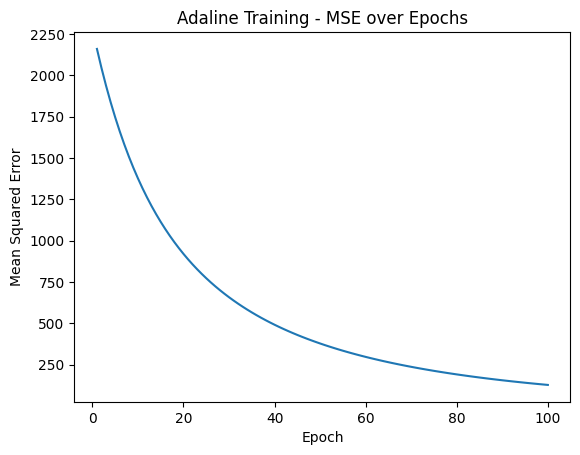

In [5]:
# Plot MSE vs Epochs
plt.plot(range(1, len(model.errors) + 1), model.errors)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Adaline Training - MSE over Epochs')
plt.show()